In [1]:
from src import functions as func
from src import feagen as feag
import datetime
import numpy as np
from datetime import datetime,timedelta
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers.core import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.pooling import MaxPooling2D
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [2]:
path = '../dataSets/training/'
file_suffix = '.csv'
in_file = 'trajectories(table 5)_training'
travel_times = func.read_file_to_travel_times(path, in_file, file_suffix)

am_window = 3*3  #5:00~8:00
pm_window = 3*9 #8:00~17:00
num_instance = 4*7 # 4 weeks
num_routes = 6
num_window = 13*3 # 6 ~ 19
routes = travel_times.keys()
window_size = timedelta(minutes=20)
window_start = datetime.strptime('2016-09-19 06:00:00', "%Y-%m-%d %H:%M:%S")
window_end = datetime.strptime('2016-09-19 19:00:00', "%Y-%m-%d %H:%M:%S")




target = {}

for d in range(num_instance):
    window_scanner = window_start
    for t in range(num_window):
        for r in range(num_routes):
            try:
                target[(window_scanner,routes[r].split('-')[1])] += len(travel_times[routes[r]][window_scanner])
            except:
                target[(window_scanner,routes[r].split('-')[1])] = 0
        window_scanner += window_size
    window_start += timedelta(days=1)
    window_end += timedelta(days=1) 

In [4]:
path = '../dataSets/training/'
file_suffix = '.csv'
in_file = 'volume(table 6)_training'
volumes = func.read_file_to_volumes(path, in_file, file_suffix)


In [10]:
dir_care = '0'
all_tol = ['1','2','3']
num_instance = 4*7 # 4 weeks
num_window = 13*3 # 6 ~ 19
window_size = timedelta(minutes=20)
window_start = datetime.strptime('2016-09-19 06:00:00', "%Y-%m-%d %H:%M:%S")
window_end = datetime.strptime('2016-09-19 19:00:00', "%Y-%m-%d %H:%M:%S")

v_target = {}

for d in range(num_instance):
    window_scanner = window_start
    for t in range(num_window):
        for tol in all_tol:
            try:
                v_target[(window_scanner,tol)] = volumes[window_scanner][tol][dir_care]
            except:
                v_target[(window_scanner, tol)] = 0
        window_scanner += window_size
    window_start += timedelta(days=1)
    window_end += timedelta(days=1) 



In [13]:
window_size = timedelta(minutes=20)
window_start = datetime.strptime('2016-09-19 06:00:00', "%Y-%m-%d %H:%M:%S")
window_end = datetime.strptime('2016-09-19 19:00:00', "%Y-%m-%d %H:%M:%S")
num_instance = 4*7 # 4 weeks
num_window = 13*3 # 6 ~ 19
this_tol = '3'
t_count = []
v_count = []

for d in range(num_instance):
    window_scanner = window_start
    for t in range(num_window):
        t_count.append(target[(window_scanner,this_tol)])
        v_count.append(v_target[(window_scanner,this_tol)])
        window_scanner += window_size
    window_start += timedelta(days=1)
    window_end += timedelta(days=1) 



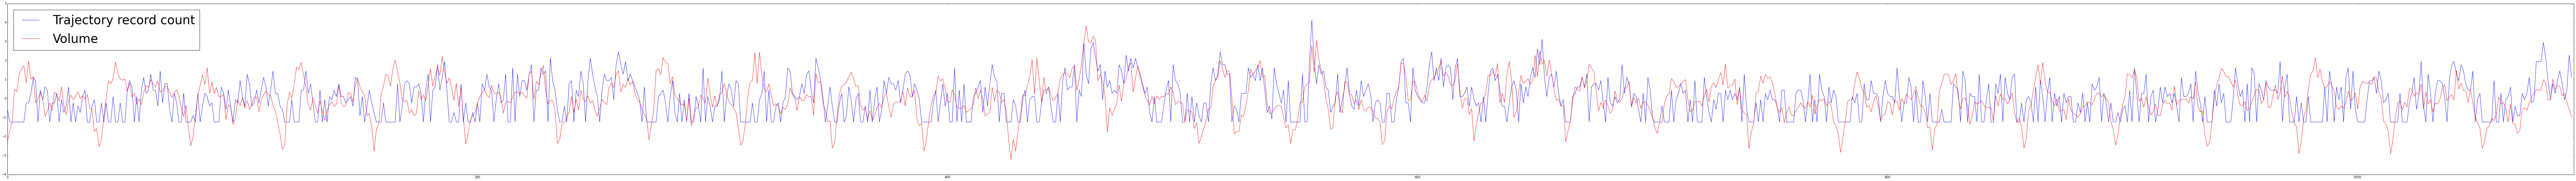

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
t_count = preprocessing.scale(t_count)
v_count = preprocessing.scale(v_count)
plt.figure(figsize=(150,10))
plt.plot(t_count,color='blue', label='Trajectory record count')

plt.plot(v_count,color='red', label='Volume')
plt.legend(loc='upper left',prop={'size':40})
plt.xlim([0,1092])

plt.savefig('t2.png')